In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("C:\Machine Learning\Walmart_Sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,40214.0,1643690.90,0.0,42.31,2.572,211.096,8.106
1,1.0,40221.0,1641957.44,1.0,38.51,2.548,211.242,8.106
2,1.0,40228.0,1611968.17,0.0,39.93,2.514,211.289,8.106
3,1.0,40235.0,1409727.59,0.0,46.63,2.561,211.320,8.106
4,1.0,40242.0,1554806.68,0.0,46.50,2.625,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45.0,41180.0,713173.95,0.0,64.88,3.997,192.014,8.684
6431,45.0,41187.0,733455.07,0.0,64.89,3.985,192.170,8.667
6432,45.0,41194.0,734464.36,0.0,54.47,4.000,192.327,8.667
6433,45.0,41201.0,718125.53,0.0,56.47,3.969,192.331,8.667


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
y=df['Weekly_Sales']
x=df.iloc[ : , : -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_transform=sc.fit_transform(x)
x_transform


array([[-1.69397911, -1.71998062,  1.05741972, ..., -0.99513556,
        -1.71379998,  1.00416618],
       [-1.69397911, -1.69575554,  1.05434796, ..., -1.20117022,
        -1.76608938,  1.00787613],
       [-1.69397911, -1.67153046,  1.00120591, ..., -1.12417832,
        -1.84016603,  1.00907043],
       ...,
       [ 1.69397911,  1.67153046, -0.55376202, ..., -0.33582468,
         1.39741931,  0.52723454],
       [ 1.69397911,  1.69575554, -0.58271501, ..., -0.22738539,
         1.32987884,  0.52733618],
       [ 1.69397911,  1.71998062, -0.50801326, ..., -0.09834264,
         1.14032976,  0.52677715]])

In [6]:
np.array(y).flatten

<function ndarray.flatten>

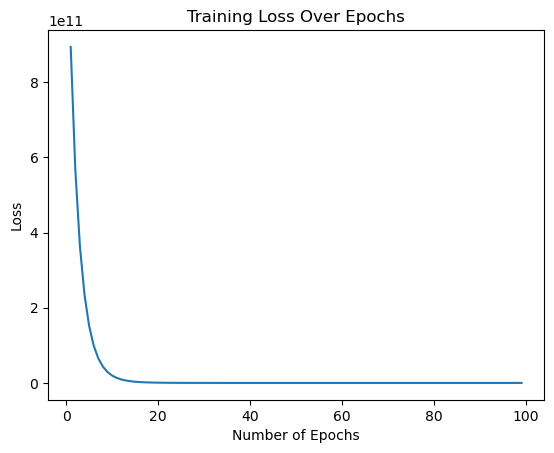

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def predicted_y(x, weights, intercept):
    return np.dot(x, weights) + intercept

def loss(y, y_predict):
    n = len(y)
    s = np.sum((y - y_predict) ** 2)
    return (1 / n) * s

def dww(x, y, y_predict):
    n = len(x)
    s = 0
    for i in range(n):
        s += (-x[i]) * (y[i] - y_predict[i])
    return (2 / n) * s

def dwi(y, y_predict):
    n = len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predict[i])
    return (2/n) * s

def gradient_descent(x, y):
    weight_vector = np.random.randn(x.shape[1])
    learning_rate = 0.1
    epochs = 100
    intercept = 0
    linear_loss = []
    
    for i in range(epochs):
        y_predict = predicted_y(x, weight_vector, intercept)
        weight_vector = weight_vector - learning_rate * dww(x, y, y_predict)
        intercept = intercept - learning_rate `* dwi(y, y_predict)
        linear_loss.append(loss(y, y_predict))
    
    plt.plot(np.arange(1, epochs), linear_loss[1:])
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.show()
    
    return weight_vector, intercept




w, b = gradient_descent(x_transform, y)



In [14]:
print(w)

[-59888.73365581   2215.1250317  468451.36880728   4895.41814649
  -8486.37093072   2201.36466763 -22053.40491923]


In [9]:
print(b)

1046964.8773485011


In [10]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [11]:
y_pred=predict(x_transform)
y_pred

array([1643643.73697377, 1641879.18627882, 1611946.23478374, ...,
        734467.32373951,  718143.49267946,  760332.70440665])

In [12]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,1643690.90,1643643.7
1,1641957.44,1641879.2
2,1611968.17,1611946.2
3,1409727.59,1409698.7
4,1554806.68,1554758.7
...,...,...
6430,713173.95,713176.6
6431,733455.07,733464.9
6432,734464.36,734467.3
6433,718125.53,718143.5
